In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
import json


experiments = ["target"]
seeds = [10]
plot_std = True
p = json.load(
    open(f"figures/{experiments[0]}/parameters.json")
)
selected_epochs = np.arange(p["n_epochs"])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Extract data

In [23]:
dqn_scores = {}
for experiment in experiments:
    dqn_scores[experiment] = {}
    dqn_scores[experiment] = np.zeros((p["n_epochs"], len(seeds))) * np.nan
    for idx_seed, seed in enumerate(seeds):
        dqn_scores[experiment][:, idx_seed] = np.load(f"figures/{experiment}/DQN/J_{seed}.npy")

### IQM vs iterations & performance profile

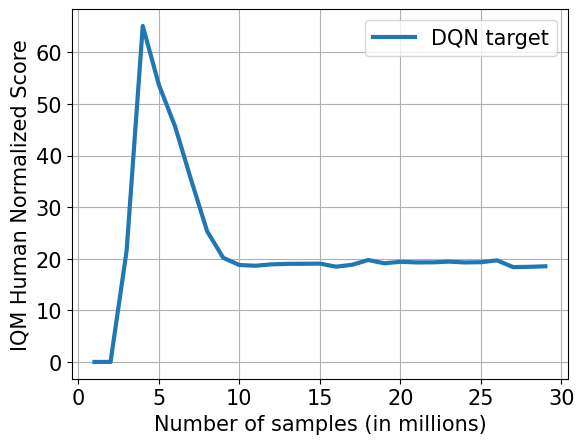

In [24]:
import matplotlib.pyplot as plt
from dqn.utils.process_scores import compute_iqm_and_confidence_interval


plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

for experiment in experiments:
    iqms, iqms_confidence_interval = compute_iqm_and_confidence_interval(dqn_scores[experiment], selected_epochs)
    plt.plot(selected_epochs + 1, iqms, label=f"DQN {experiment}")
    if plot_std:
        plt.fill_between(selected_epochs + 1, iqms_confidence_interval[0, :], iqms_confidence_interval[1, :], alpha=0.3)

plt.grid(zorder=0)
plt.xlabel("Number of samples (in millions)")
plt.ylabel("IQM Human Normalized Score")
_ = plt.legend()